#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Travel Package Purchase Prediction 
##### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Project 4

### by Anthony Amabile
This model is to help the Marketing Department as well as the Policy Maker of Visit with Us tourism company to identify:

1. More detailed information about their customers.
2. But more importantly, to predict which customers will likely purchase the newly introduced Wellness Tourism travel package.

The company currently offers 5 types of packages: Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, it was observed that 18% of the customers purchased one of these packages.

In [57]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [58]:
import os
os.chdir('/Users/Tony/Documents/Texas Austin AI ML/Ensemble Techniques/Project 4')
os.getcwd()

'c:\\Users\\Tony\\Documents\\Texas Austin AI ML\\Ensemble Techniques\\Project 4'

In [59]:
data = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')
df = data.copy()
df.sample(10, random_state=1)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.00,Company Invited,1,7.00,Salaried,Female,4,6.00,Basic,3.00,Married,5.00,0,4,1,3.00,Executive,"23,042.00"
1242,201242,0,40.00,Self Enquiry,3,13.00,Small Business,Male,2,3.00,King,4.00,Single,2.00,0,4,1,nan,VP,"34,833.00"
3073,203073,0,29.00,Self Enquiry,2,15.00,Small Business,Male,4,5.00,Basic,3.00,Married,3.00,0,2,0,2.00,Executive,"23,614.00"
804,200804,0,48.00,Company Invited,1,6.00,Small Business,Male,2,1.00,Super Deluxe,3.00,Single,3.00,0,2,0,0.00,AVP,"31,885.00"
3339,203339,0,32.00,Self Enquiry,1,18.00,Small Business,Male,4,4.00,Deluxe,5.00,Divorced,3.00,1,2,0,3.00,Manager,"25,511.00"
3080,203080,1,36.00,Company Invited,1,32.00,Salaried,Female,4,4.00,Basic,4.00,Married,3.00,1,3,0,1.00,Executive,"20,700.00"
2851,202851,0,46.00,Self Enquiry,1,17.00,Salaried,Male,4,4.00,Basic,3.00,Divorced,5.00,0,5,1,1.00,Executive,"21,332.00"
2883,202883,1,32.00,Company Invited,1,27.00,Salaried,Male,4,4.00,Standard,3.00,Divorced,5.00,0,3,1,1.00,Senior Manager,"28,502.00"
1676,201676,0,22.00,Self Enquiry,1,11.00,Salaried,Male,2,1.00,Basic,4.00,Married,2.00,1,4,1,0.00,Executive,"17,328.00"
1140,201140,0,44.00,Self Enquiry,1,13.00,Small Business,Female,2,3.00,King,3.00,Married,1.00,1,4,1,1.00,VP,"34,049.00"


In [60]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the original dataset.')

There are 4888 rows and 20 columns in the original dataset.


In [61]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Single,1.00,1,2,1,0.00,Manager,"20,993.00"
1,200001,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,"20,130.00"
2,200002,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Single,7.00,1,3,0,0.00,Executive,"17,090.00"
3,200003,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,"17,909.00"
4,200004,0,nan,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,"18,468.00"


In [62]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [63]:
# checking for duplicate values
df.duplicated().sum()

0

Most of the data is nicely formatted with no duplicate values. There are some null values that will need to be examined.

In addition, the string attribute columns of Typeofcontact, Occupation, Gender, ProductPitched, MaritalStatus, and Designation will need to be converted to dummy columns. We will revisit this when building our model.

In [64]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

There are no more than just over 250 null values for a given column. A closer look is needed at these null values.

In [65]:
# counting the number of missing values per row
df.isnull().sum(axis=1).value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

No row has more than 3 missing values in it.

In [66]:
pd.options.display.float_format = '{:,.2f}'.format
df.isnull().sum(axis=1).value_counts()/df.shape[0]

0   0.84
1   0.11
2   0.04
3   0.01
dtype: float64

However, roughly 16% of the data has a null value.

In [67]:

num_missing = df.isnull().sum(axis=1)
df[num_missing == 3].sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1217,201217,0,24.00,NaN,1,nan,Small Business,Male,3,1.00,Basic,3.00,Married,2.00,0,1,0,0.00,Executive,nan
724,200724,0,24.00,NaN,1,nan,Small Business,Female,2,4.00,Deluxe,3.00,Married,2.00,0,3,1,1.00,Manager,nan
843,200843,0,26.00,NaN,1,nan,Small Business,Male,2,1.00,Basic,3.00,Divorced,2.00,0,5,1,1.00,Executive,nan
1047,201047,0,33.00,NaN,3,nan,Small Business,Male,2,3.00,Deluxe,5.00,Divorced,1.00,0,3,0,0.00,Manager,nan
2194,202194,0,24.00,NaN,1,nan,Small Business,Female,2,4.00,Deluxe,3.00,Married,2.00,0,3,0,0.00,Manager,nan
572,200572,0,29.00,NaN,1,nan,Small Business,Female,3,3.00,Deluxe,3.00,Divorced,5.00,0,2,1,0.00,Manager,nan
2313,202313,0,26.00,NaN,1,nan,Small Business,Male,2,1.00,Basic,3.00,Married,2.00,0,5,1,1.00,Executive,nan
1143,201143,0,45.00,NaN,3,nan,Small Business,Male,2,4.00,Deluxe,5.00,Married,2.00,0,3,0,0.00,Manager,nan
2092,202092,0,32.00,NaN,3,nan,Salaried,Male,3,3.00,Deluxe,3.00,Married,3.00,0,1,0,2.00,Manager,nan
1694,201694,0,31.00,NaN,1,nan,Small Business,Male,2,5.00,Deluxe,3.00,Married,1.00,0,3,0,0.00,Manager,nan


In [68]:
df[num_missing == 1].sample(n=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4812,204812,0,44.00,Self Enquiry,1,10.00,Salaried,Male,4,6.00,King,nan,Married,5.00,0,5,1,1.00,VP,"38,418.00"
3584,203584,0,45.00,Self Enquiry,1,14.00,Small Business,Female,3,4.00,King,3.00,Married,nan,1,4,1,2.00,VP,"37,727.00"
291,200291,0,36.00,Self Enquiry,1,nan,Large Business,Male,1,3.00,Deluxe,4.00,Single,5.00,0,2,1,0.00,Manager,"19,485.00"
1567,201567,0,28.00,Company Invited,3,10.00,Small Business,Male,2,3.00,Deluxe,3.00,Married,2.00,0,1,0,0.00,Manager,nan
4240,204240,0,40.00,Company Invited,1,14.00,Small Business,Male,3,5.00,King,3.00,Married,nan,0,5,1,1.00,VP,"37,950.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,200482,1,31.00,Self Enquiry,3,19.00,Small Business,Male,2,3.00,Deluxe,5.00,Married,3.00,0,2,0,0.00,Manager,nan
3775,203775,0,49.00,Self Enquiry,1,17.00,Salaried,Male,4,5.00,King,nan,Married,6.00,0,3,1,2.00,VP,"38,343.00"
2333,202333,0,nan,Self Enquiry,2,8.00,Salaried,Male,3,3.00,Basic,3.00,Married,2.00,0,1,1,2.00,Executive,"18,600.00"
4145,204145,0,43.00,Self Enquiry,1,11.00,Large Business,Male,3,4.00,King,3.00,Married,nan,0,1,0,1.00,VP,"37,910.00"


For Age (float), DurationOFPitch (float), NumberofTrips (float), NumberofChildrenVisiting(float), NumberofFollowups (float), PreferredPropertyStar(float), and MonthlyIncome (float) we can simply input the median value in place of the null values. For TypeofContact (object), we will input the mode in place of null values.

In [69]:

cols_transform = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'MonthlyIncome']
for col in cols_transform:
    #mean imputation
    df[col].fillna(df[col].median(), inplace=True)    





In [70]:
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

In [71]:
pd.options.display.float_format = '{:,.2f}'.format
df.isnull().sum(axis=1).value_counts()/df.shape[0]

0   1.00
dtype: float64

All of the NA and NaN values have been addressed.

In [72]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00,Self Enquiry,3,6.00,Salaried,Female,3,3.00,Deluxe,3.00,Single,1.00,1,2,1,0.00,Manager,"20,993.00"
1,200001,0,49.00,Company Invited,1,14.00,Salaried,Male,3,4.00,Deluxe,4.00,Divorced,2.00,0,3,1,2.00,Manager,"20,130.00"
2,200002,1,37.00,Self Enquiry,1,8.00,Free Lancer,Male,3,4.00,Basic,3.00,Single,7.00,1,3,0,0.00,Executive,"17,090.00"
3,200003,0,33.00,Company Invited,1,9.00,Salaried,Female,2,3.00,Basic,3.00,Divorced,2.00,1,5,1,1.00,Executive,"17,909.00"
4,200004,0,36.00,Self Enquiry,1,8.00,Small Business,Male,2,3.00,Basic,4.00,Divorced,1.00,0,5,1,0.00,Executive,"18,468.00"


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [74]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

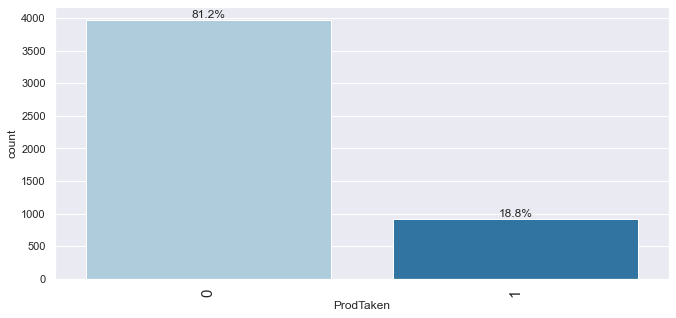

In [75]:
labeled_barplot(df, 'ProdTaken', perc=True, n=10)

In [76]:
df.groupby('ProdTaken').size()

ProdTaken
0    3968
1     920
dtype: int64

Only 920 customers (18.8%) in the data have purchased a travel package. 

In [77]:
df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,"4,888.00","202,443.50","1,411.19","200,000.00","201,221.75","202,443.50","203,665.25","204,887.00"
ProdTaken,"4,888.00",0.19,0.39,0.00,0.00,0.00,0.00,1.00
Age,"4,888.00",37.55,9.10,18.00,31.00,36.00,43.00,61.00
CityTier,"4,888.00",1.65,0.92,1.00,1.00,1.00,3.00,3.00
DurationOfPitch,"4,888.00",15.36,8.32,5.00,9.00,13.00,19.00,127.00
NumberOfPersonVisiting,"4,888.00",2.91,0.72,1.00,2.00,3.00,3.00,5.00
NumberOfFollowups,"4,888.00",3.71,1.00,1.00,3.00,4.00,4.00,6.00
PreferredPropertyStar,"4,888.00",3.58,0.80,3.00,3.00,3.00,4.00,5.00
NumberOfTrips,"4,888.00",3.23,1.82,1.00,2.00,3.00,4.00,22.00
Passport,"4,888.00",0.29,0.45,0.00,0.00,0.00,1.00,1.00


Observations
1. There are 4,888 customers in our data set.  
2. The median age for customers in the data set is 36. The highest age is 61 and the lowest is 18.
3. The median city tier of customers in the data is 1. 
4. The median duration of a pitch is 13 minutes, with the minimum being 5 minutes.
5. The median number of people visiting for customers in the data set is 3.
6. The median number of follow ups with the customer is 4.
7. The median number of preferred property stars is 3.
8. The median number of trips a customer takes in a year is 3.
9. Only 29% of customers in the data set have a passport.
10. The typical pitch satisfaction score is a 4.
11. 62% of the customers in the data set own a car.
12. There is typically at least 1 child visiting for the customers in the data set.
13. The median monthly income for customers in the data set is $22,347.
14. Roughly 19% of customers in the data set have purchased a travel package.

Nearly 1 in 5 of the customers in the data set have purchased a travel package before. The typical customer is in their mid thirties and lives in a tier 1 city. The typical pitch is usually 13 minutes with a satisfaction score of 4 with usually 4 follow ups with the customer. The preferred property stars is at least 3, with typically 3 people visiting with one of the three usually being a child. Customers typically take 3 trips per year. The majority of customers do not have a passport but do typically own a car. 


In [79]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

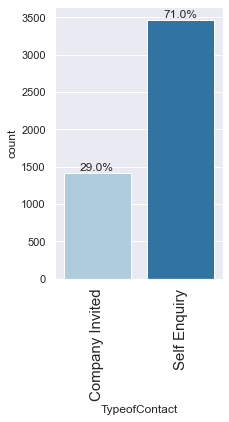

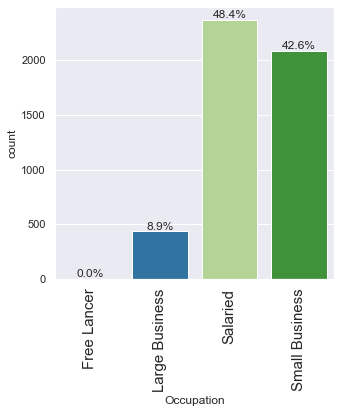

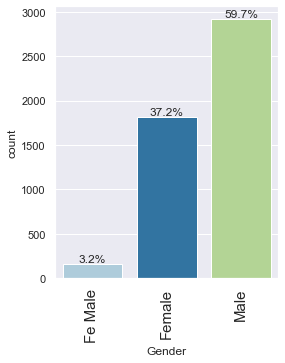

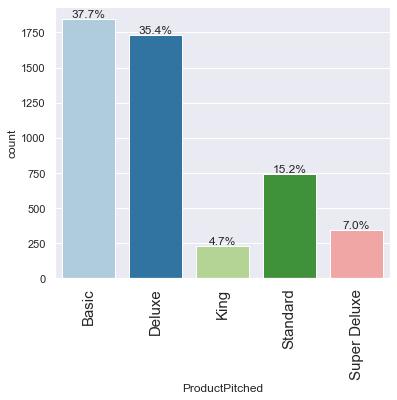

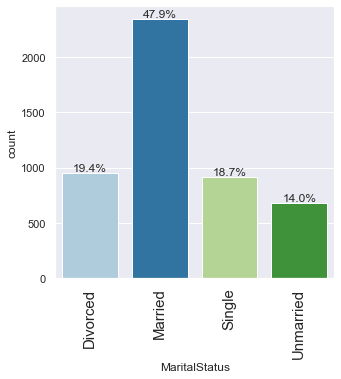

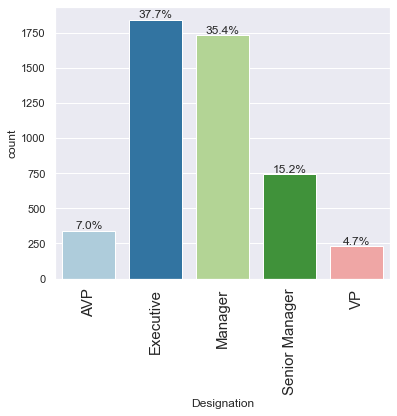

In [80]:
for col in df.select_dtypes(include=['object']):
    labeled_barplot(df, col, perc=True)

- An overwhelming majority (70%) of customers get in touch with the company via self-inquiry.
- The overwhelming majority (91%) of customers are either salaried or own a small business.
- Most of the customers (60%) are male. We will need to clean up the columns that say "Fe Male" to "Female."
- The majority of products pitched (73%) are either basic or deluxe with the more popular product pitched between the two being basic.
- The nearly half of the customers (48%) are married, roughly 1 in 5 are divorced or single, with a minority (14%) being unmarried.
- All the customers are atleast a manager in the current organization, with the most common designations being "executive" (38%) with the next most common designation being "manager" (35%).

In [81]:
#code to replace Fe male with Female in the gender column
df['Gender'].replace('Fe Male', 'Female', inplace=True)

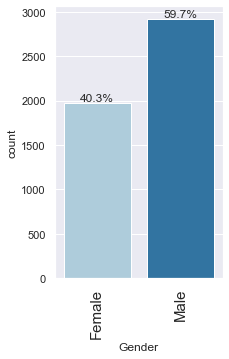

In [82]:
labeled_barplot(df, 'Gender', perc=True)

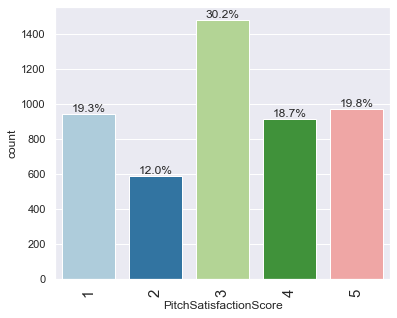

In [83]:
labeled_barplot(df, 'PitchSatisfactionScore', perc=True)

- Most of the pitches receive a middle of the road score of 3.

Bivariate Analysis

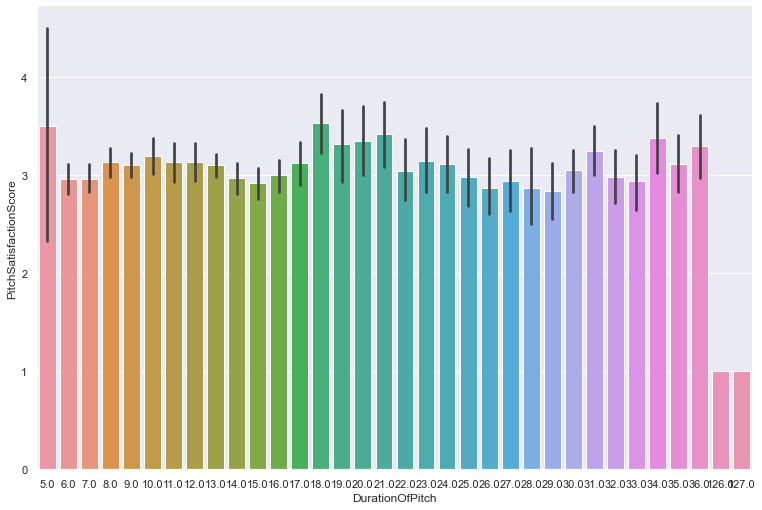

In [84]:
sns.catplot(x="DurationOfPitch", y="PitchSatisfactionScore", data=df, kind='bar', height=7, aspect=1.5, estimator=np.mean);

- It seems the shortest pitches get higher pitch satisfaction scores and the longest pitches have the lowest satisfaction scores.

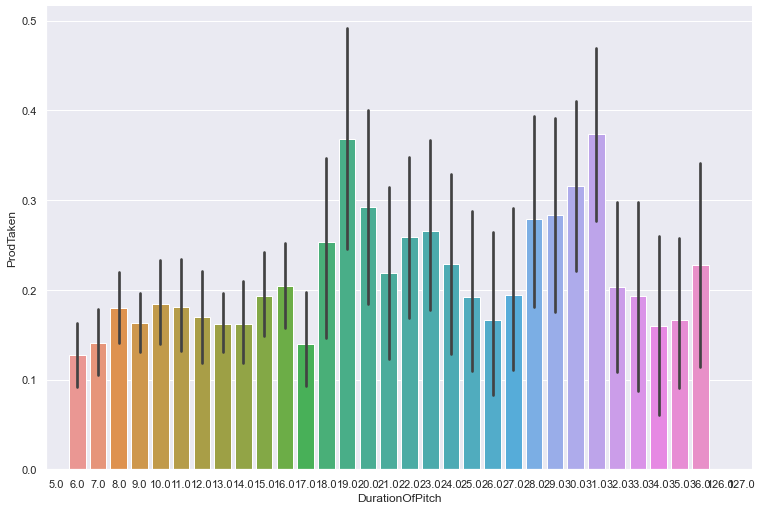

In [85]:
sns.catplot(x="DurationOfPitch", y="ProdTaken", data=df, kind='bar', height=7, aspect=1.5, estimator=np.mean);

- However, it seems the pitch duration is most effective between 19 and 31 minutes.

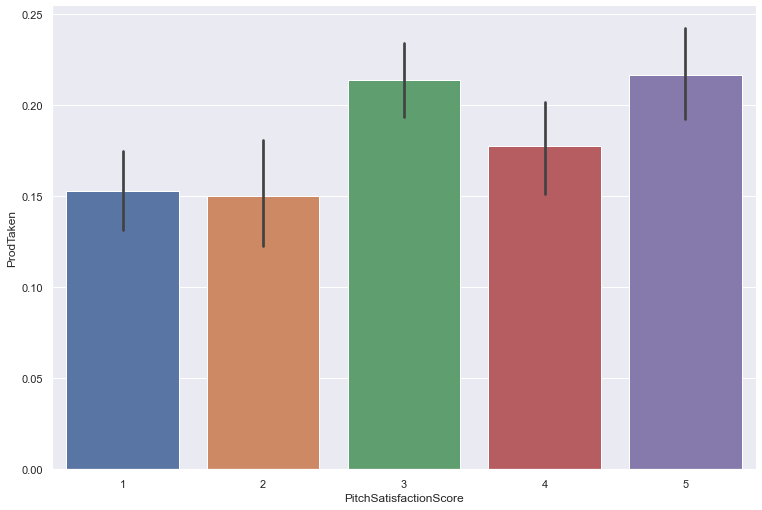

In [86]:
sns.catplot(x="PitchSatisfactionScore", y="ProdTaken", data=df, kind='bar', height=7, aspect=1.5, estimator=np.mean);

- Pitch satisfaction score doesn't seem to have a strong relationship to whether a customer made a purchase or not.

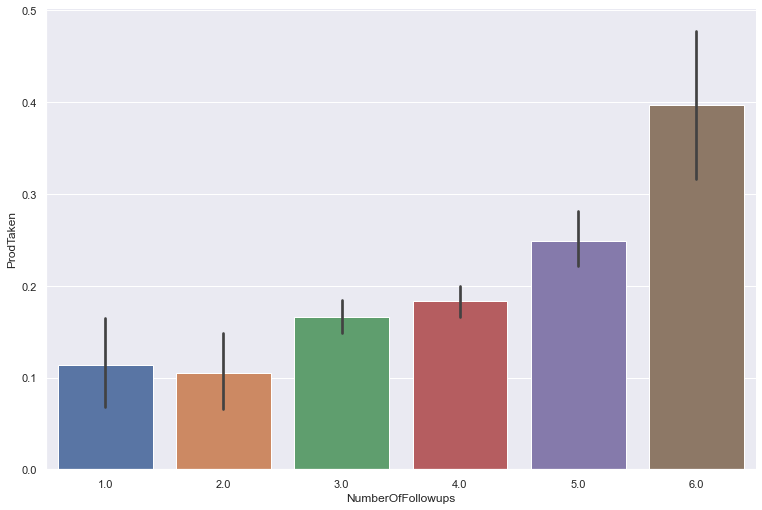

In [87]:
sns.catplot(x="NumberOfFollowups", y="ProdTaken", data=df, kind='bar', height=7, aspect=1.5, estimator=np.mean);

- It seems the more follow ups, the more likely a customer is to purchase a travel package.

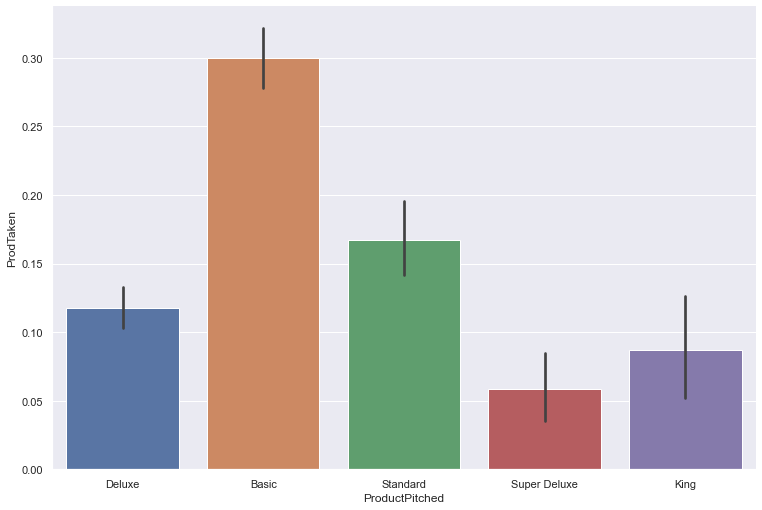

In [88]:
sns.catplot(x="ProductPitched", y="ProdTaken", data=df, kind='bar', height=7, aspect=1.5, estimator=np.mean);

- A higher number of purchases occur when the Basic travel package is pitched.

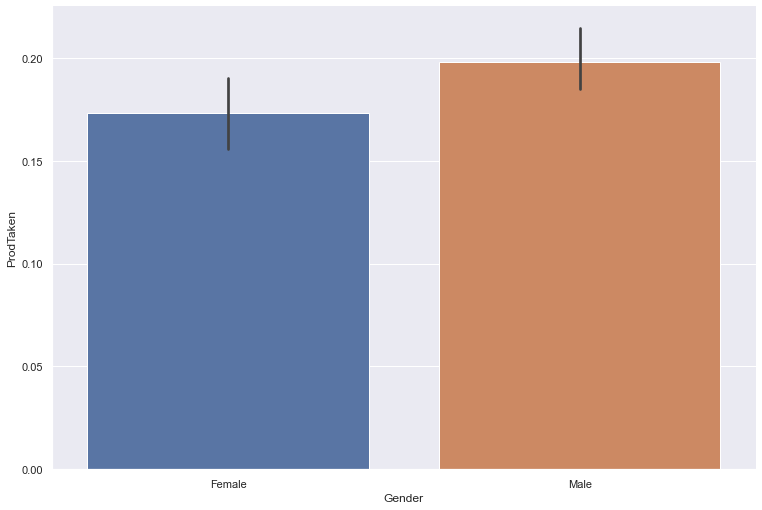

In [89]:
sns.catplot(x="Gender", y="ProdTaken", data=df, kind='bar', height=7, aspect=1.5, estimator=np.mean);

- While there are more males in the dataset, females are almost just as likely as males to purchase a travel package.

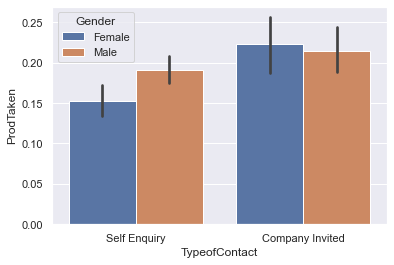

In [90]:
#gender, prodtaken, typeofcontact

sns.barplot(df['TypeofContact'], df['ProdTaken'], hue = df["Gender"])
plt.show()

- It seems both men and women are more likely to purchase a travel package if the company is involved in contacting them.. This is especially true with women.

In [91]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [92]:
df.select_dtypes(include=['object']).columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

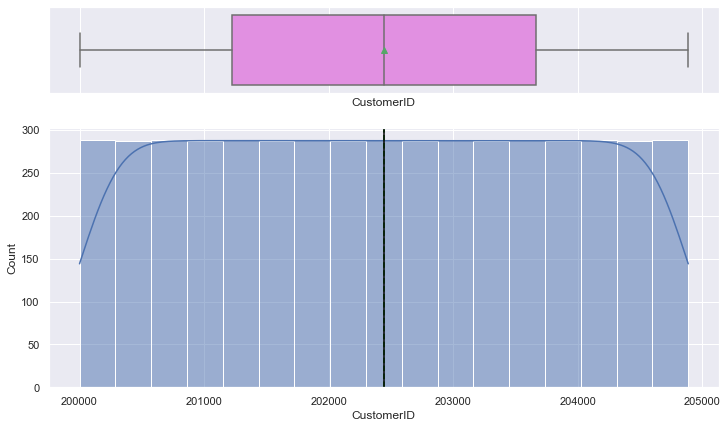

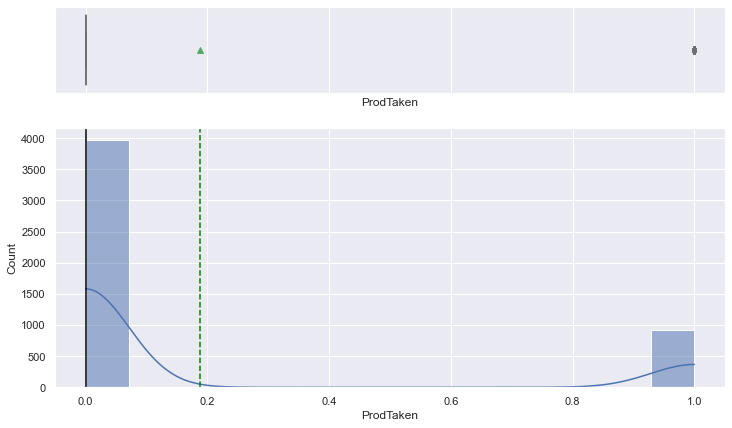

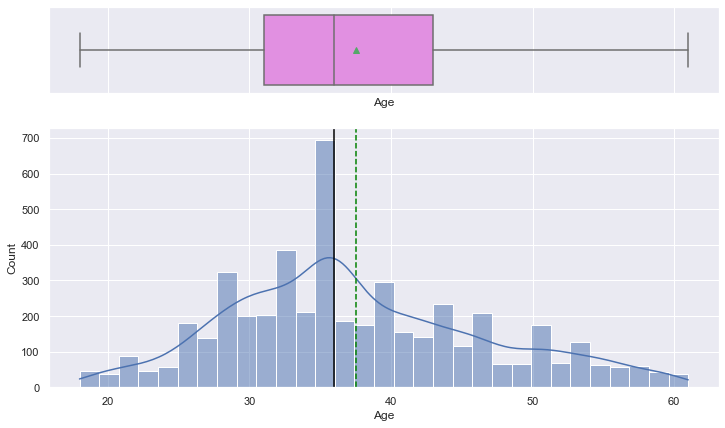

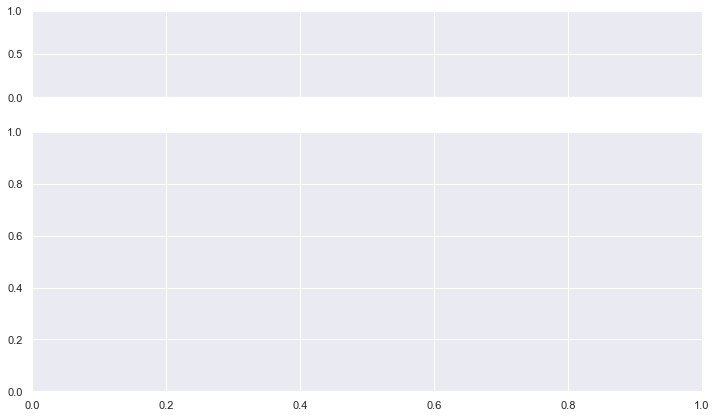

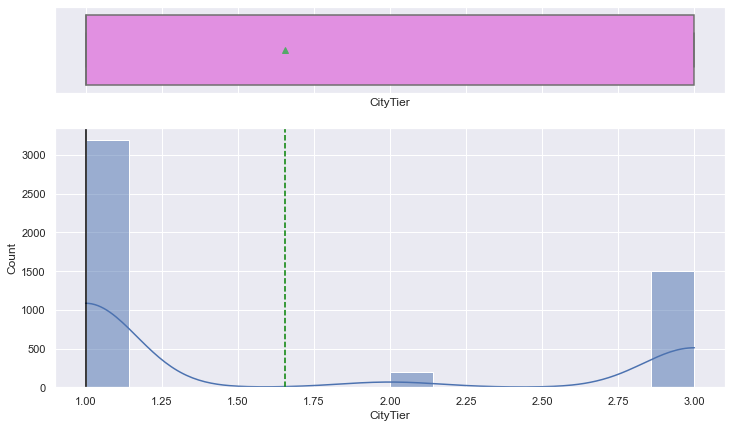

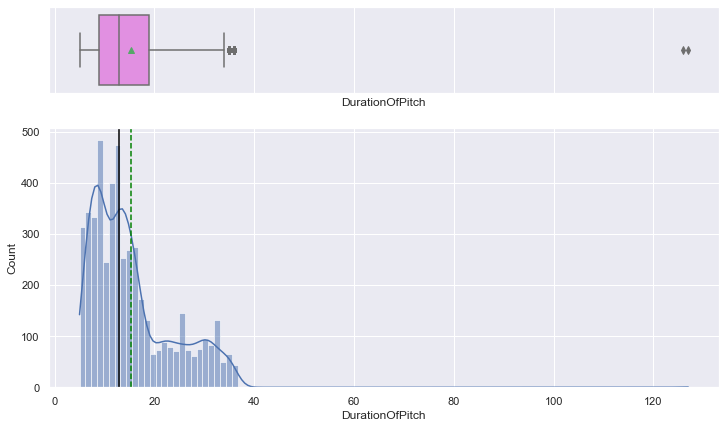

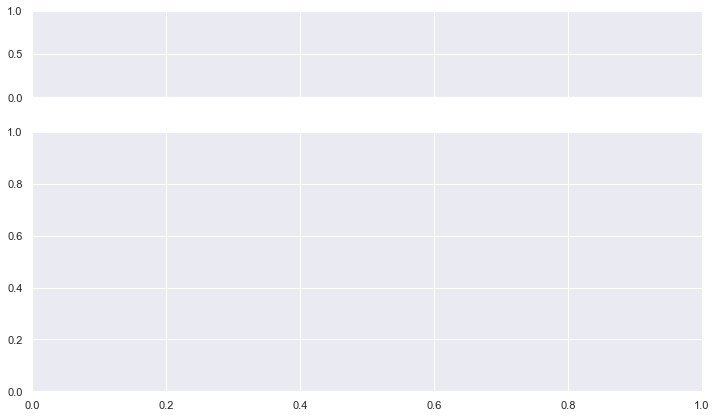

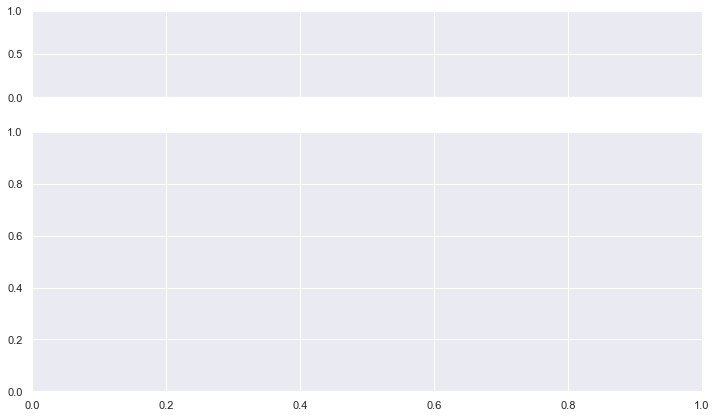

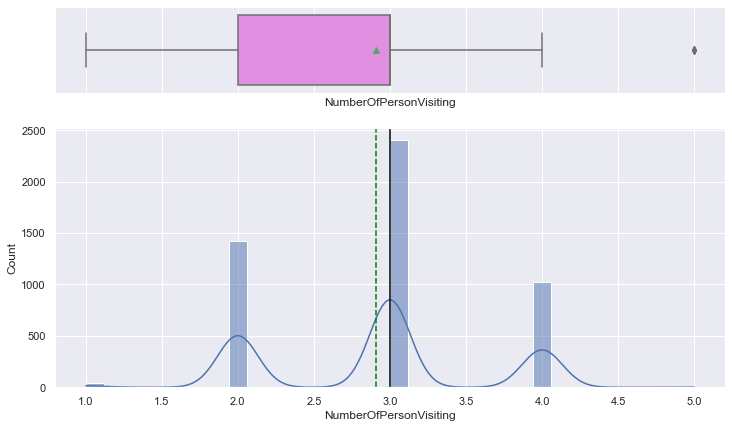

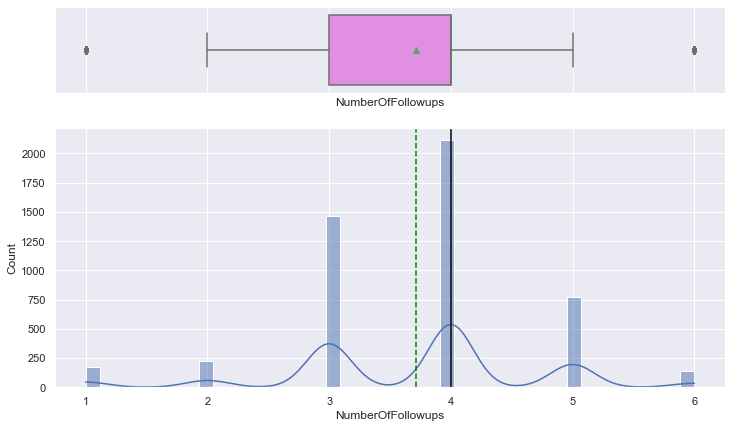

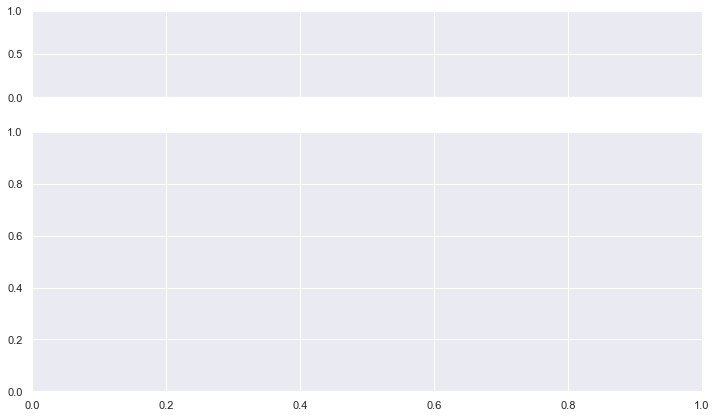

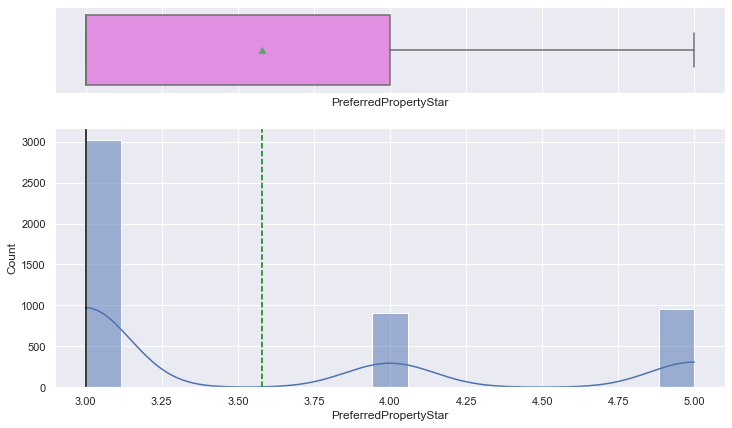

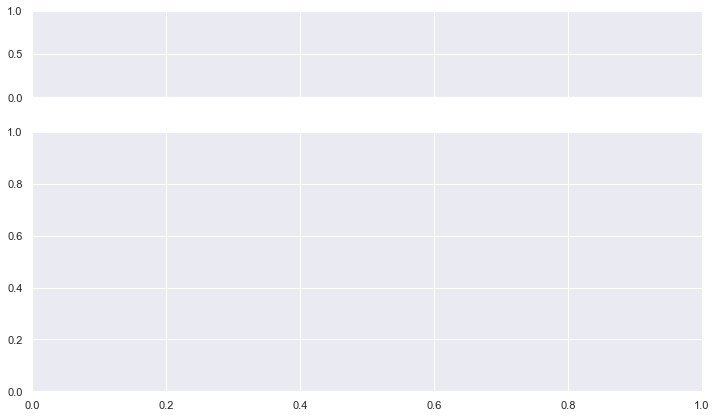

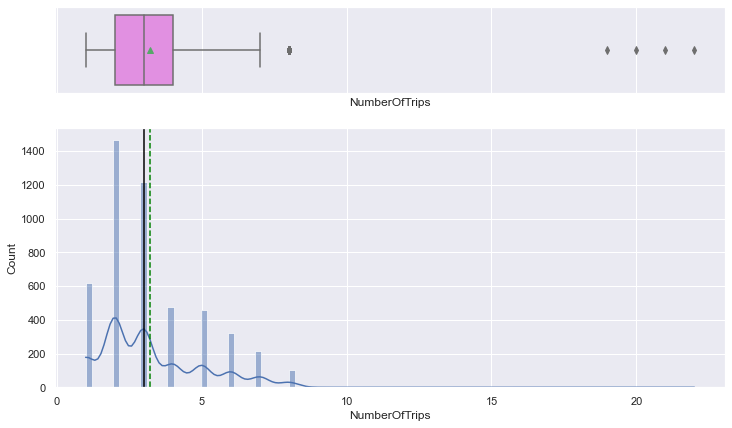

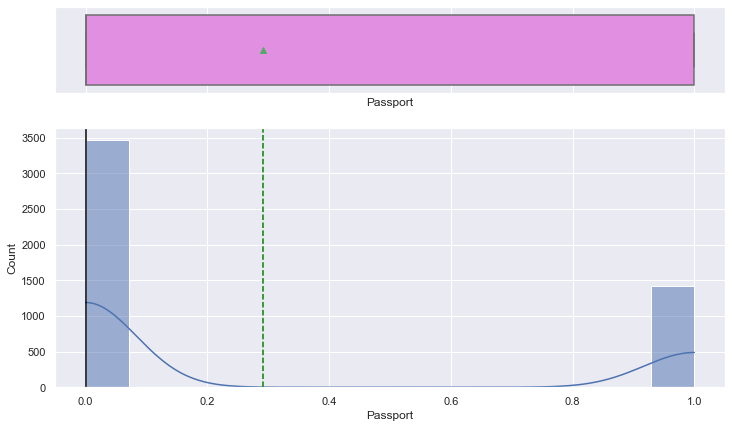

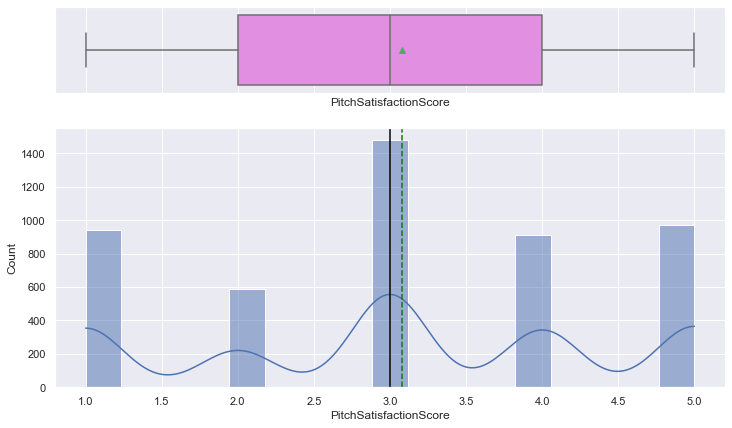

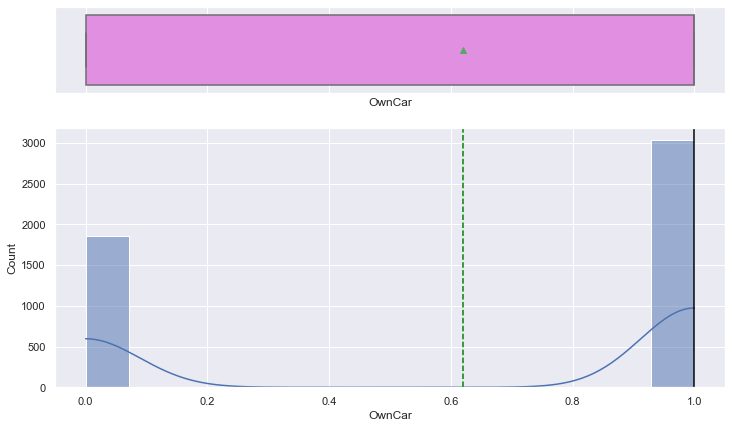

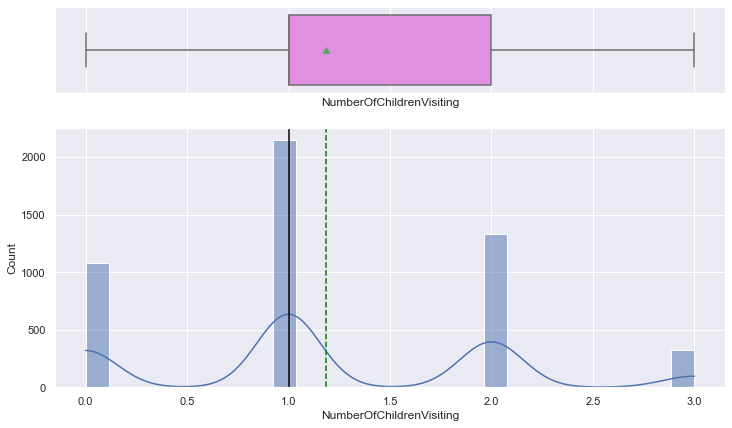

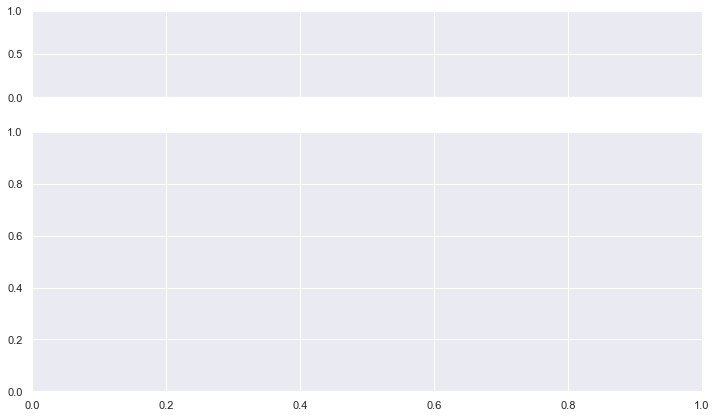

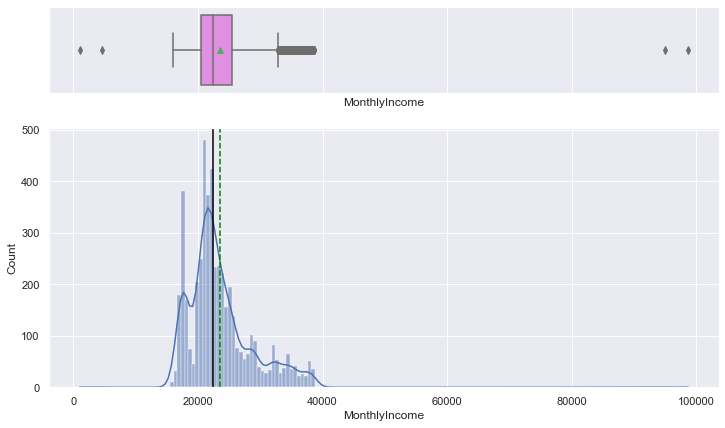

In [94]:
cols = list(df.columns)
if col in  df.select_dtypes(include=['object']).columns:
    cols.remove(col)


for col in cols:
    try:
        histogram_boxplot(df, col, kde=True)
    except:
        continue


* A few columns are skewed and may need to be z transformed.
* There are also a handful of outliers that will need to be examined and most likely dropped.
* Before dealing with the skewness, outliers will be handled.
* Columns with notable outliers include: DurationOfPitch, NumberOfTrips and MonthlyIncome. 

In [194]:
df.loc[df['DurationOfPitch'] > 40]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
61,200061,0,38.00,Company Invited,1,35.00,Salaried,Female,2,3.00,Deluxe,3.00,Single,2.00,0,3,1,0.00,Manager,"17,406.00"
138,200138,0,25.00,Self Enquiry,3,34.00,Salaried,Male,2,4.00,Deluxe,3.00,Divorced,3.00,0,4,0,0.00,Manager,"23,639.00"
141,200141,0,36.00,Self Enquiry,1,35.00,Small Business,Male,2,3.00,Basic,3.00,Single,6.00,0,2,1,0.00,Executive,"18,452.00"
199,200199,0,38.00,Self Enquiry,1,35.00,Large Business,Male,2,3.00,Deluxe,3.00,Divorced,4.00,0,2,0,1.00,Manager,"21,261.00"
204,200204,1,38.00,Self Enquiry,1,35.00,Small Business,Male,3,3.00,Deluxe,5.00,Divorced,1.00,1,3,0,1.00,Manager,"21,673.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,204738,0,43.00,Self Enquiry,1,36.00,Small Business,Male,3,6.00,Deluxe,3.00,Unmarried,6.00,0,3,1,2.00,Manager,"22,950.00"
4779,204779,0,31.00,Self Enquiry,3,36.00,Salaried,Male,4,4.00,Deluxe,5.00,Married,2.00,0,1,1,1.00,Manager,"22,793.00"
4789,204789,0,45.00,Self Enquiry,1,36.00,Salaried,Male,3,4.00,Deluxe,3.00,Unmarried,3.00,0,5,1,2.00,Manager,"23,219.00"
4832,204832,1,52.00,Company Invited,1,35.00,Salaried,Male,4,5.00,Deluxe,3.00,Single,5.00,0,3,0,1.00,Manager,"38,525.00"


In [184]:
df.drop(df.loc[df['DurationOfPitch'] > 40].index, axis=0, inplace=True) 

In [187]:
df.loc[df['NumberOfTrips'] > 10]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,200385,1,30.00,Company Invited,1,10.00,Large Business,Male,2,3.00,Basic,3.00,Single,19.00,1,4,1,1.00,Executive,"17,285.00"
816,200816,0,39.00,Company Invited,1,15.00,Salaried,Male,3,3.00,Deluxe,4.00,Unmarried,21.00,0,2,1,0.00,Manager,"21,782.00"
2829,202829,1,31.00,Company Invited,1,11.00,Large Business,Male,3,4.00,Basic,3.00,Single,20.00,1,4,1,2.00,Executive,"20,963.00"
3260,203260,0,40.00,Company Invited,1,16.00,Salaried,Male,4,4.00,Deluxe,4.00,Unmarried,22.00,0,2,1,1.00,Manager,"25,460.00"


In [188]:
df.drop(df.loc[df['NumberOfTrips'] > 10].index, axis=0, inplace=True) 

In [189]:
df.loc[df['MonthlyIncome'] > 40000]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.00,Self Enquiry,1,11.00,Salaried,Female,2,4.00,Basic,3.00,Divorced,1.00,1,2,1,0.00,Executive,"95,000.00"
2482,202482,0,37.00,Self Enquiry,1,12.00,Salaried,Female,3,5.00,Basic,5.00,Divorced,2.00,1,2,1,1.00,Executive,"98,678.00"


In [190]:
df.drop(df.loc[df['MonthlyIncome'] > 40000].index, axis=0, inplace=True) 

Extreme outliers have been removed.

In [192]:
print(f'There have been {data.shape[0] - df.shape[0]} rows removed from original dataset that have been classified as outliers.')

There have been 8 rows removed from original dataset that have been classified as outliers.


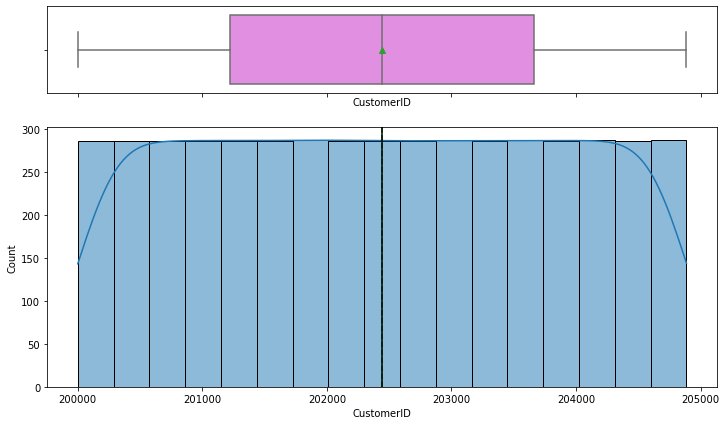

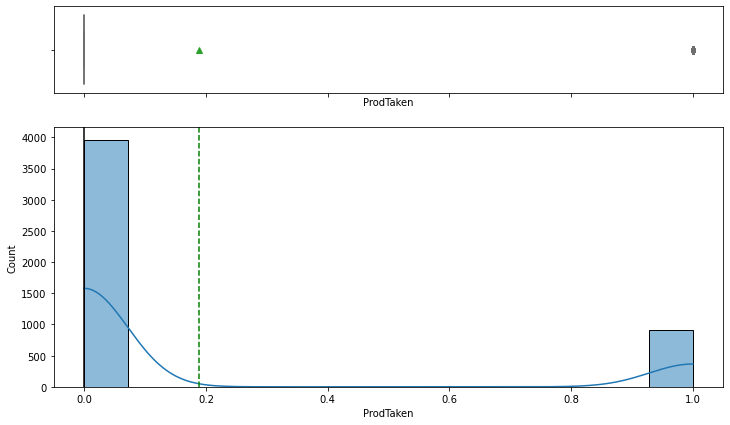

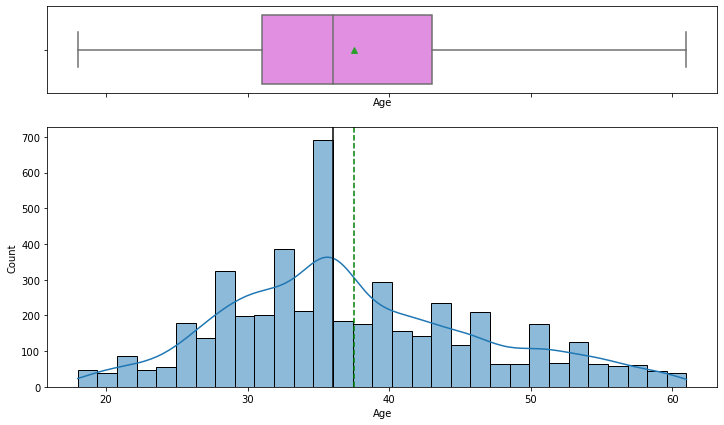

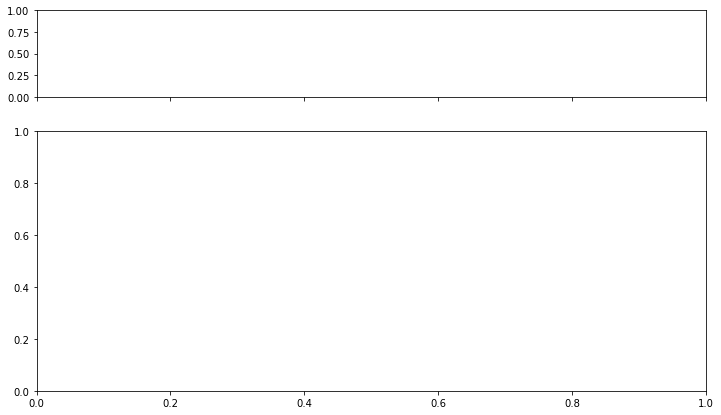

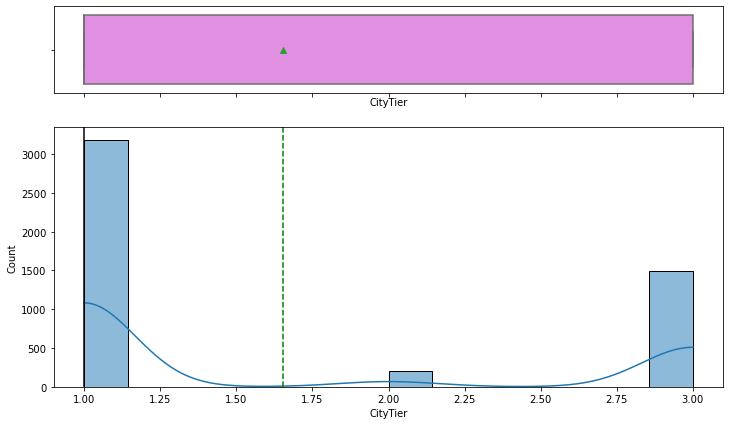

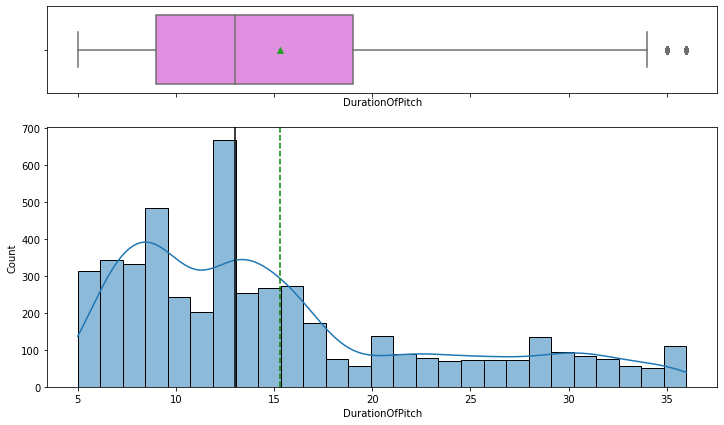

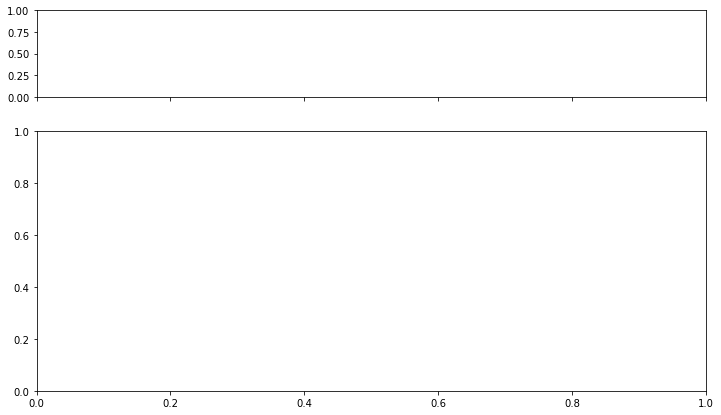

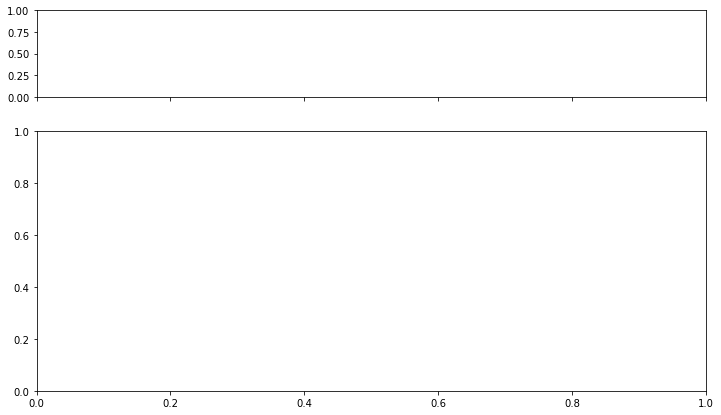

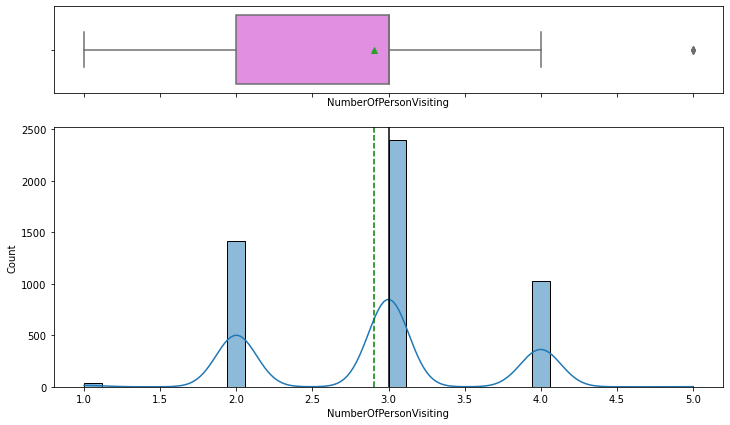

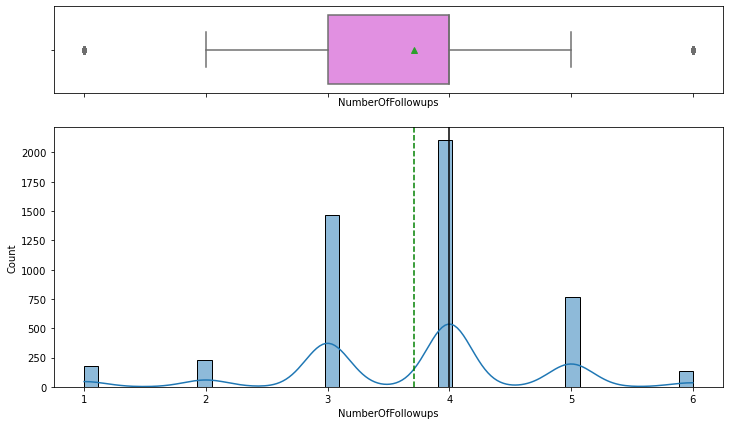

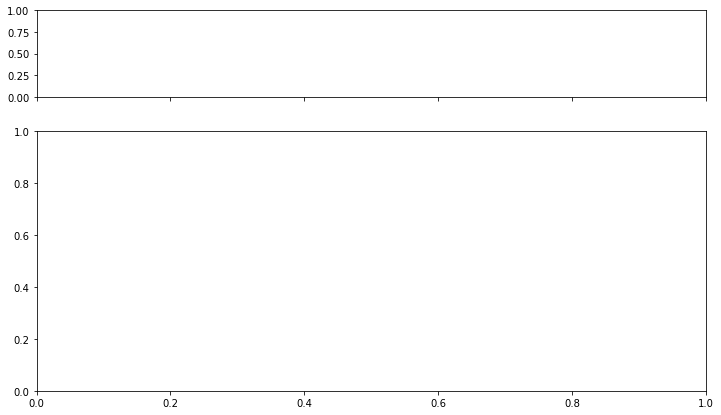

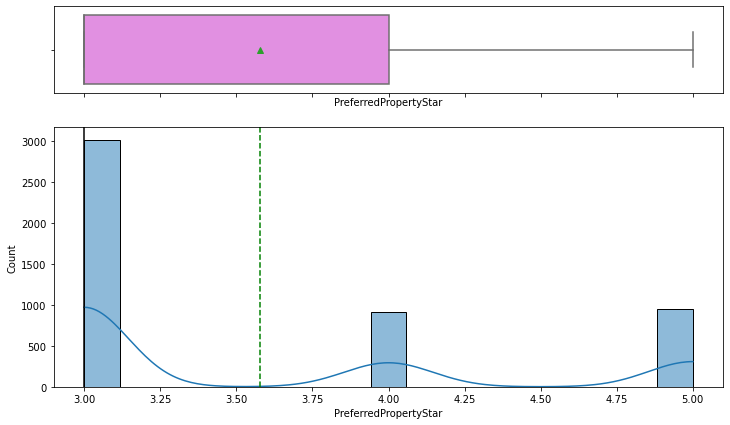

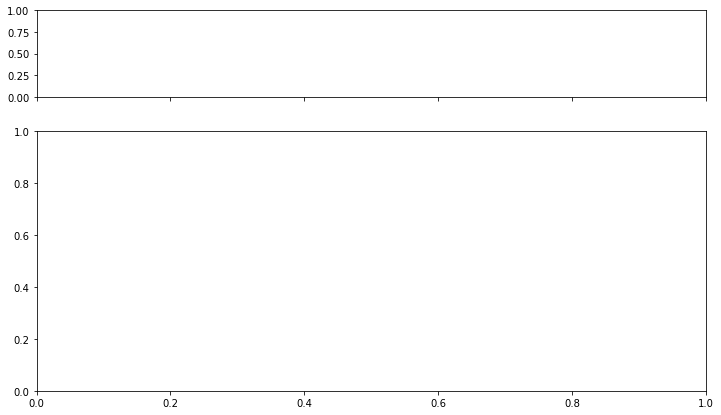

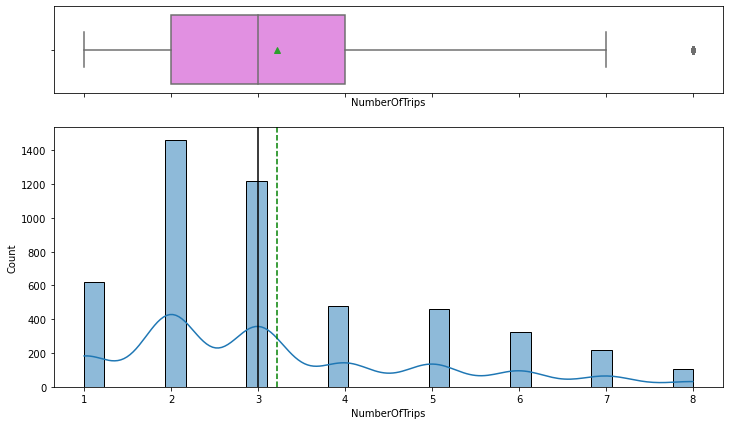

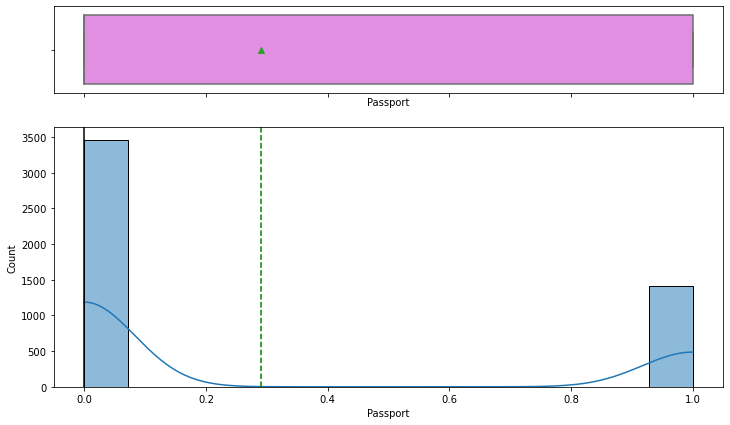

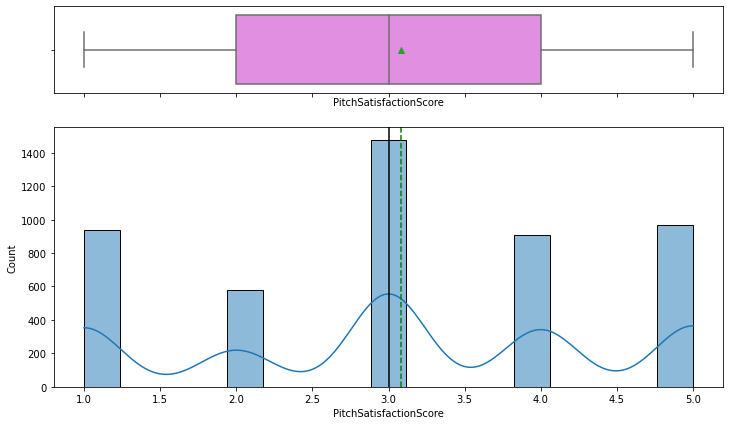

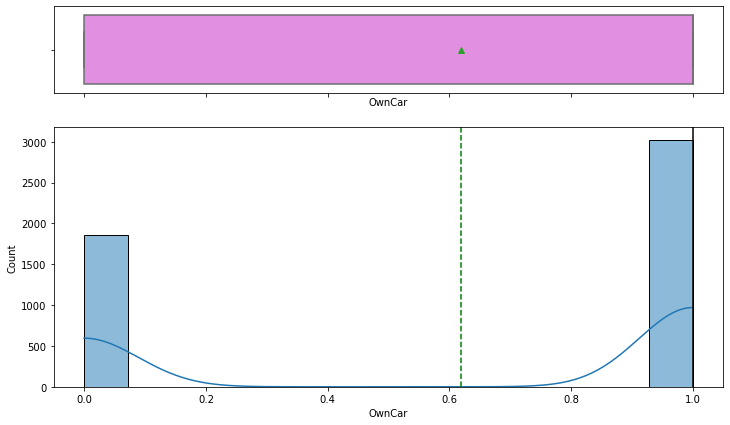

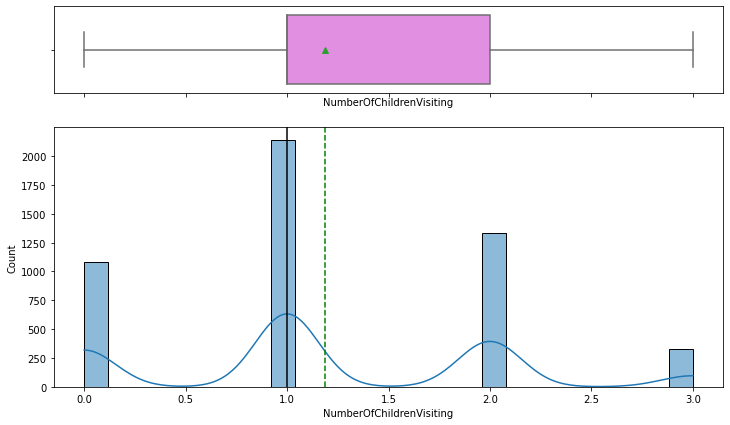

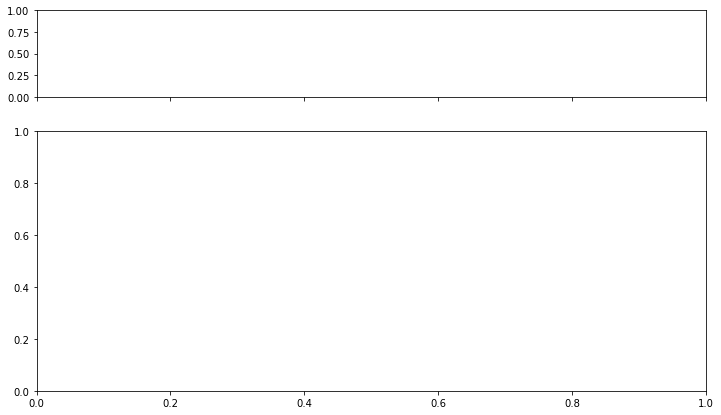

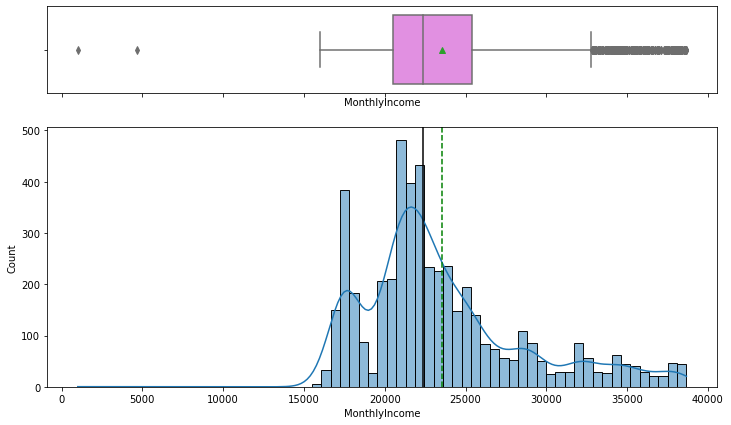

In [193]:
cols = list(df.columns)
if col in  df.select_dtypes(include=['object']).columns:
    cols.remove(col)


for col in cols:
    try:
        histogram_boxplot(df, col, kde=True)
    except:
        continue


* Just through removing those 8 rows, the data looks much more normalized. Z transformation does not seem to be necessary.

Outliers have been removed.

In [199]:
dum_cols = df.select_dtypes(include=["object"]).columns.tolist()

dum_cols

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [200]:
df_new = pd.get_dummies(
    df,
    columns=dum_cols,
    drop_first=True,
)

df_new.head()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.00,3,6.00,3,3.00,3.00,1.00,1,...,0,0,0,0,1,0,0,1,0,0
1,200001,0,49.00,1,14.00,3,4.00,4.00,2.00,0,...,0,0,0,0,0,0,0,1,0,0
2,200002,1,37.00,1,8.00,3,4.00,3.00,7.00,1,...,0,0,0,0,1,0,1,0,0,0
3,200003,0,33.00,1,9.00,2,3.00,3.00,2.00,1,...,0,0,0,0,0,0,1,0,0,0
4,200004,0,36.00,1,8.00,2,3.00,4.00,1.00,0,...,0,0,0,0,0,0,1,0,0,0


In [203]:
print(f'There have been {df_new.shape[1] - data.shape[1]} columns added to the original dataset for dummy columns.')

There have been 10 columns added to the original dataset for dummy columns.


In [204]:
df_new.drop(['CustomerID'], axis=1, inplace=True) 

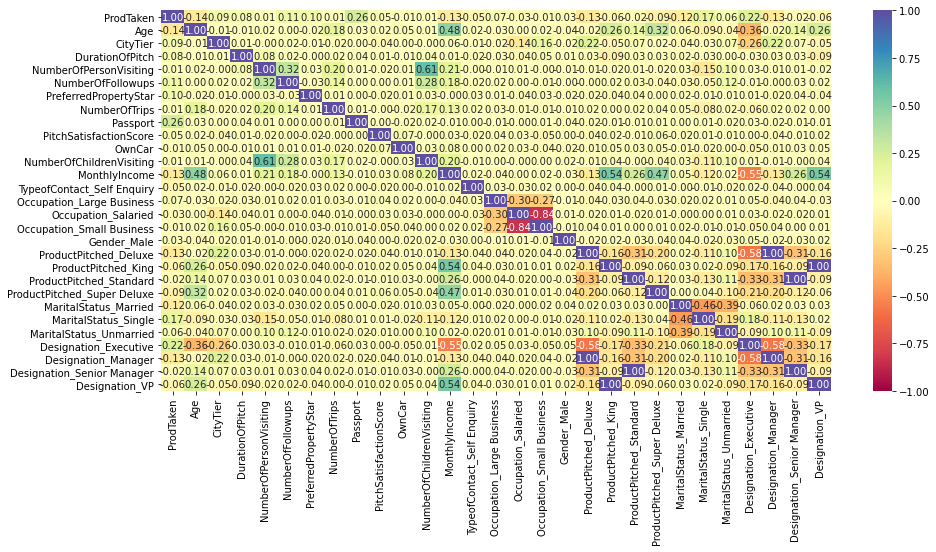

In [205]:
cols_list = df_new.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df_new[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

The column Occupation_Salaried has a high negative correlation with Occupation_Small_Business, so we will drop Occupation_Salaried.

In [206]:
df_new.drop(['Occupation_Salaried'], axis=1, inplace=True) 

In [207]:
print(f'After preparing our data for modeling, it has {df_new.shape[0]:,.0f} rows and {df_new.shape[1]} columns.')

After preparing our data for modeling, it has 4,880 rows and 28 columns.


In [208]:
X = df_new.drop(["ProdTaken"], axis=1)
y = df_new["ProdTaken"]

In [215]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1, stratify=y)


In [216]:
print('The number of rows in the train data is', x_train.shape[0])
print('The number of rows in the test data is', x_test.shape[0])

The number of rows in the train data is 3416
The number of rows in the test data is 1464


In [217]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.81
1   0.19
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0   0.81
1   0.19
Name: ProdTaken, dtype: float64


In [213]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [214]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Bagging Classifier Model

Training performance:
    Accuracy  Recall  Precision   F1
0      0.99    0.96       1.00 0.98
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.58       0.86 0.69


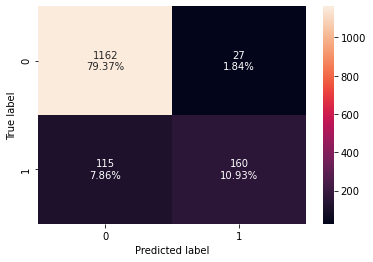

In [218]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(x_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,x_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,x_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, x_test, y_test)

* Bagging classifier is overfitting the training data and has poor recall and F1 scores.

Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.91    0.56       0.92 0.70


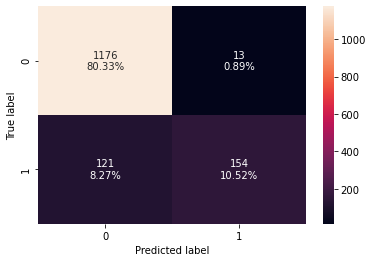

In [219]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,x_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,x_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, x_test, y_test)

While the random forest model does have improved precision compared to the bagging classifier model, this model is also overfitting the data and is still a poor model. The F1 and recall scores can probably be improved.

Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.88    0.69       0.69 0.69


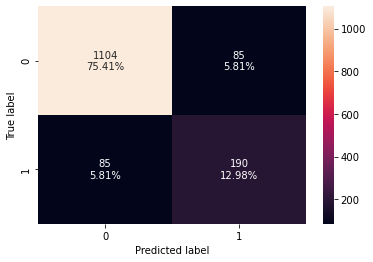

In [220]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(x_train,y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(d_tree,x_train,y_train)
print("Training performance:\n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(d_tree,x_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, x_test, y_test)

The decision tree model is performing about as well as the bagging classifier and random forest models. This model is also overfit and has poor recall, precision and F1.

Tuning Bagging Classifier

In [221]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.91    0.60       0.91 0.72


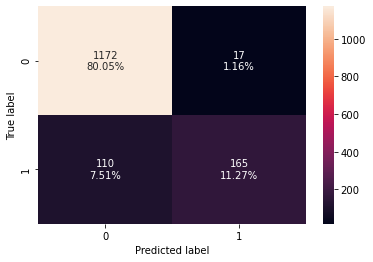

In [232]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,x_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,x_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, x_test, y_test)

The bagging classifier model, while still overfit, has improved fairly substaintially over the initial bagging classifier model in all metrics. However, it is still not a great model at accurately predicting which customers are more likely to purchase a travel package.

Tuning Random Forest

In [224]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features=None, min_samples_split=7, oob_score=True,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0      0.99    1.00       0.97 0.98
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.65       0.78 0.71


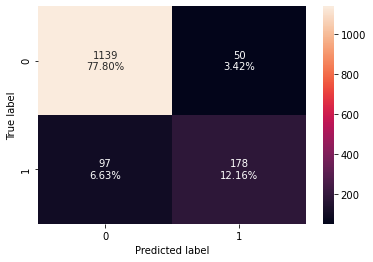

In [225]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,x_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,x_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, x_test, y_test)

Similiarly, the random forest model, while still overfit, has also improved very marginally in recall and F1 score but performance has deteriorated in accuracy and precision. It is still not a great model at accurately predicting which customers are more likely to purchase a travel package.

Tuning Decision Tree

In [226]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=6,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0      0.83    0.53       0.56 0.54
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.82    0.53       0.52 0.53


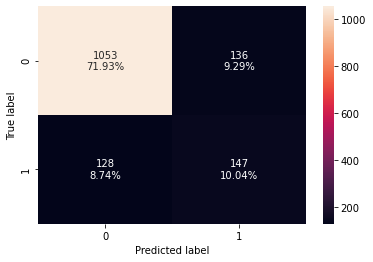

In [227]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,x_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,x_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, x_test, y_test)

* Tuning the Decision Tree model has reduced performance across all metrics. This is the worst performing model.

Comparing All the Models

In [235]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T, dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,
     ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Estimator"
    ]
print("Training performance comparison:")
models_train_comp_df    

Training performance comparison:


,Bagging Classifier,Bagging Estimator Tuned,Random Forest Estimator,Random Forest Tuned,Decision Tree,Decision Tree Estimator
Accuracy,0.99,1.00,1.00,0.99,1.00,0.83
Recall,0.96,1.00,1.00,1.00,1.00,0.53
Precision,1.00,1.00,1.00,0.97,1.00,0.56
F1,0.98,1.00,1.00,0.98,1.00,0.54


* The tuned bagging estimator, random forest estimator and the original decision tree models perform perfectly on the training data.

In [236]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        bagging_classifier_model_test_perf.T, bagging_estimator_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T, dtree_model_test_perf.T, dtree_estimator_model_test_perf.T
     ],
    axis=1,
)

models_test_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Decision Tree",
    "Decision Tree Estimator"  
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Bagging Classifier,Bagging Estimator Tuned,Random Forest Estimator,Random Forest Tuned,Decision Tree,Decision Tree Estimator
Accuracy,0.90,0.91,0.91,0.90,0.88,0.82
Recall,0.58,0.60,0.56,0.65,0.69,0.53
Precision,0.86,0.91,0.92,0.78,0.69,0.52
F1,0.69,0.72,0.70,0.71,0.69,0.53


The model with the best performance on the testing data is arguably the original Decision Tree model because it has the highest recall score at .69, meaning it correctly identifies which customers are most likely to purchase a travel package most accurately out of all the models. 

Although, it can potentially be argued that the tuned random forest model has the best overall performance. This model doesn't have the highest recall score, it has the second highest recall score at .65 and as well as generally good accuracy, precision and F1 score. However, recall is the most important for model performance evaluation because it explains how well the model correctly identifies positives out of total true postives. Meaning, if the company were to spend marketing and advertisting dollars based on how the model classifies those that are most likely to purchase a travel package, it would see the greatest return with the original decision tree model.

Adaboost Calssifier

   Accuracy  Recall  Precision   F1
0      0.85    0.35       0.71 0.47
   Accuracy  Recall  Precision   F1
0      0.83    0.33       0.59 0.43


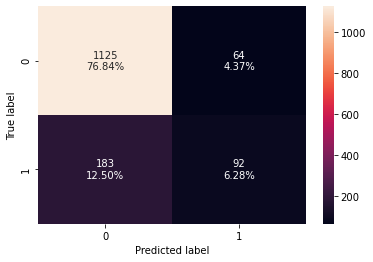

In [238]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,x_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,x_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,x_test,y_test)

* Adaboost is giving much more poorer performance than previous models. 

Hyperparameter Tuning

In [240]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=1)

   Accuracy  Recall  Precision   F1
0      0.99    0.97       1.00 0.98
   Accuracy  Recall  Precision   F1
0      0.88    0.59       0.72 0.65


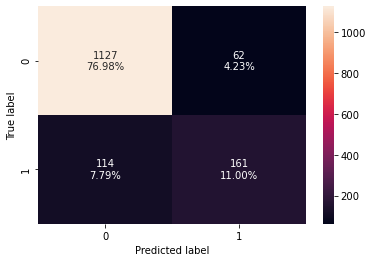

In [241]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,x_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,x_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,x_test,y_test)

* With tunning, the Adaboost classifier model has improved substaintially. However, the recall score is still poor so that will try to be enhanced.

Gradient Boosting Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0      0.89    0.49       0.87 0.63
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.87    0.43       0.76 0.55


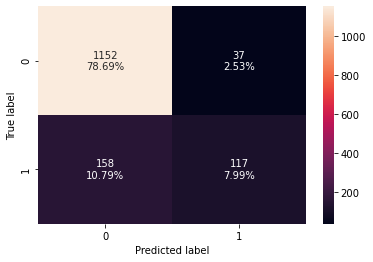

In [239]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(x_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,x_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,x_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,x_test,y_test)

* The initial gradient boosting classifier is also a poor model.

Hyperparameter Tuning

In [242]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy  Recall  Precision   F1
0      0.93    0.65       0.95 0.77
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.88    0.47       0.79 0.59


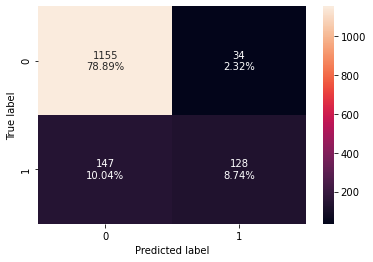

In [243]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,x_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,x_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,x_test,y_test)

* There is not much difference in the model performance after hyperparameter tuning for the gradient boosting classifier model.

XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.92    0.69       0.86 0.77


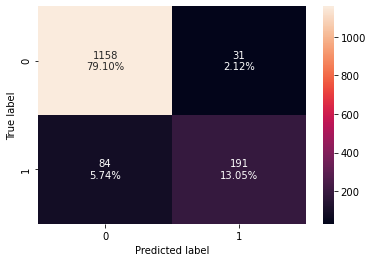

In [244]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(x_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,x_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,x_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,x_test,y_test)

* The initial XGBoost model seems to be the best performing model for this data thus far; matching the highest recall score from earlier models and with overal good generlized performance. 

* Like the other models, this model will be tuned to see if performance improves.

Hyperparameter Tuning

In [246]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Training performance:
    Accuracy  Recall  Precision   F1
0      0.97    0.99       0.88 0.93
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.88    0.80       0.66 0.72


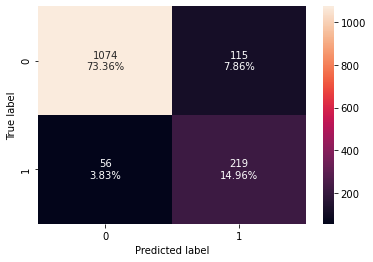

In [247]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,x_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,x_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,x_test,y_test)

The tuned XGBoost model has far and above, the best performance out of any models for this dataset. 

Stacking Classifier

In [248]:
estimators = [('Random Forest Tuned',rf_tuned), ('Bagging Estimator Tuned', bagging_estimator_tuned), ('Decision Tree', d_tree)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(x_train,y_train)

StackingClassifier(estimators=[('Random Forest Tuned',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=15,
                                                       max_features=None,
                                                       min_samples_split=7,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Bagging Estimator Tuned',
                                BaggingClassifier(max_features=0.9,
                                                  max_samples=0.9,
                                                  n_estimators=40,
                                                  random_state=1)),
                               ('Decision Tree',
                                DecisionTreeCla

Training performance:
    Accuracy  Recall  Precision   F1
0      0.99    1.00       0.94 0.97
Testing performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.84       0.69 0.76


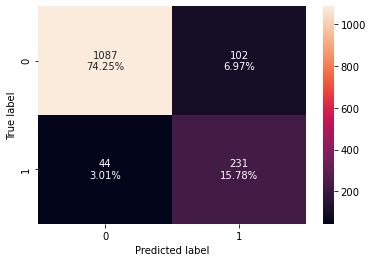

In [249]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,x_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,x_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,x_test,y_test)

* The stacking classifier is giving a similar performance as compared the tuned XGBoost model with overall improved general performance.
* This is the highest recall score of any of the models we have applied to the data. With this model, we can identify the vast majority of customers that are likely to purchase a travel package.

Comparing All Models

In [250]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.00,0.83,1.00,0.99,0.99,1.00,0.85,0.99,0.89,0.93,1.00,0.97,0.99
Recall,1.00,0.53,1.00,1.00,0.96,1.00,0.35,0.97,0.49,0.65,1.00,0.99,1.00
Precision,1.00,0.56,1.00,0.97,1.00,1.00,0.71,1.00,0.87,0.95,1.00,0.88,0.94
F1,1.00,0.54,1.00,0.98,0.98,1.00,0.47,0.98,0.63,0.77,1.00,0.93,0.97


In [251]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.88,0.82,0.91,0.90,0.90,0.91,0.83,0.88,0.87,0.88,0.92,0.88,0.90
Recall,0.69,0.53,0.56,0.65,0.58,0.60,0.33,0.59,0.43,0.47,0.69,0.80,0.84
Precision,0.69,0.52,0.92,0.78,0.86,0.91,0.59,0.72,0.76,0.79,0.86,0.66,0.69
F1,0.69,0.53,0.70,0.71,0.69,0.72,0.43,0.65,0.55,0.59,0.77,0.72,0.76


* The majority of the models are overfitting the training data in terms of f1-score.
* The Stacking Classifier is giving the best overall performance but is slightly overfitting the training data.
* The tuned XGBoost model has given the second-highest test Recall Score and is giving a more enhanced generalized performance as compared to the other models. 

Feature importance of Tuned XGBoost Model

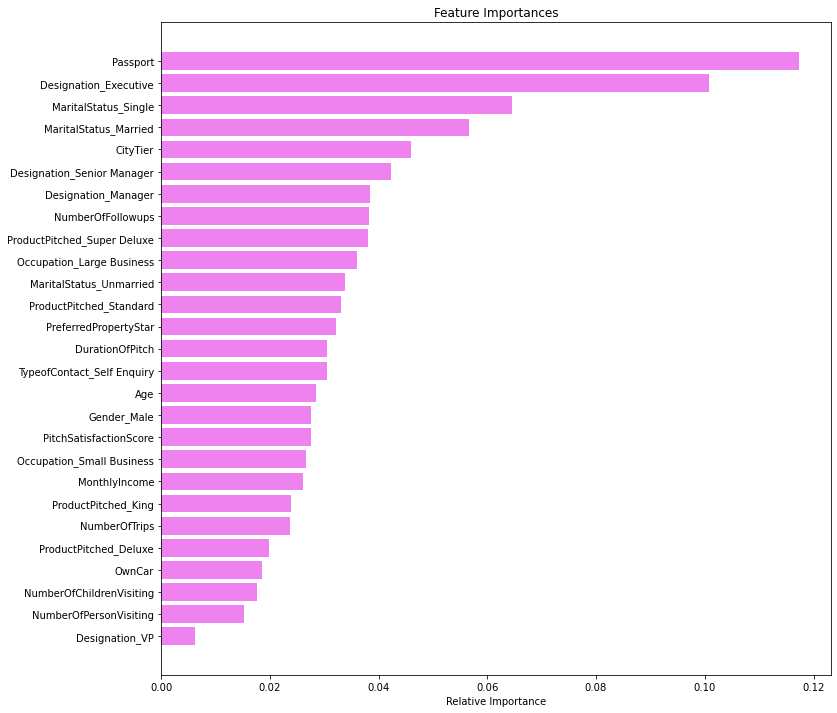

In [253]:
feature_names = x_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Weather or not a customer has a passport is the most important feature in identifying which customers are most likely to purchase a travel package.

## Conclusions

### Reccomendations
The tourism company, Visit With Us, should target the following existing and potential customers for the newly introduced travel package:
* Customers with passports.
* Customers who have a designation of "Executive."
* Customers who are either married or single. 
* Customers who are either salaried or own their own small business.
* People who are managers or above at their organization. 




Visit With Us should more on targeting the correct customer with advertising and marketing. Company-invited seems to be the preferred way method of contact for customers who buy a package, so increasing awareness of the company and it's offerings, particularly the newly introduced Wellness Tourism Package, while inviting customers to interact with them, would allow more customers who are more likely to purchase to come to the business. 

While there are more men as current customers, females are almost just as likely as males to purchase a travel package. Targeting females with marketing and advertising is an opportunity to bring in new customers to the business. 

For the sales team, when they're pitching, they should keep the pitch between 19 and 31 minutes. The sales team should always follow up with a potential customer 6 times. When they pitch, they should always pitch the Basic package first.

The company can use the model to identify the customers and potential customers most likely to purchase a travel package. This would help to reduce the customer acquisition cost and increase the number of customers of the business by getting a larger number of customers for their marketing spend.